In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from urllib.request import urlopen
import certifi
import json

In [2]:
def read_config(path):
    try:
        with open(path, 'r') as file:
            configs = json.load(file)

        return configs
    except FileNotFoundError:
        print(f"The file {path} was not found.")
    except json.JSONDecodeError:
        print(f"Error decoding JSON from the file {path}.")

In [5]:
config = read_config('../.env/configs.json')

# Get data

### FMP

In [7]:
def get_jsonparsed_data(url):
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    data_json = json.loads(data)
    return pd.DataFrame(data_json)


def get_fp(topic, stock, apikey) -> pd.DataFrame:

    url = f'https://financialmodelingprep.com/api/v3/{topic}/{stock}?limit=10&apikey={apikey}'
    print(url)
    df = get_jsonparsed_data(url)
    
    return df.sort_values('date', ascending=True)

stock = "AAPL"
fmpkey = config['fmpkey']

# the cash-flow-statement API is problematic, but i use it temperoally
df_aapl_cashflow = get_fp('cash-flow-statement', stock, fmpkey)

https://financialmodelingprep.com/api/v3/cash-flow-statement/AAPL?limit=10&apikey=5ac80141f5198c04645adbd90ba2aef1


C:\Users\Sean\AppData\Local\Temp\ipykernel_23972\243190695.py:2: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


In [8]:
df_aapl_cashflow['calendarYear'] = pd.to_datetime(df_aapl_cashflow['date']).dt.year.astype(str)
df_aapl_cashflow

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,netIncome,depreciationAndAmortization,...,netCashUsedProvidedByFinancingActivities,effectOfForexChangesOnCash,netChangeInCash,cashAtEndOfPeriod,cashAtBeginningOfPeriod,operatingCashFlow,capitalExpenditure,freeCashFlow,link,finalLink
4,2019-09-28,AAPL,USD,0000320193,2019-10-31,2019-10-30 18:12:36,2019,FY,55256000000,12547000000,...,-90976000000,0,24311000000,50224000000,25913000000,69391000000,-10495000000,58896000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
3,2020-09-26,AAPL,USD,0000320193,2020-10-30,2020-10-29 18:06:25,2020,FY,57411000000,11056000000,...,-86820000000,0,-10435000000,39789000000,50224000000,80674000000,-7309000000,73365000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,2021,FY,94680000000,11284000000,...,-93353000000,0,-3860000000,35929000000,39789000000,104038000000,-11085000000,92953000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
1,2022-09-24,AAPL,USD,0000320193,2022-10-28,2022-10-27 18:01:14,2022,FY,99803000000,11104000000,...,-110749000000,0,-10952000000,24977000000,35929000000,122151000000,-10708000000,111443000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
0,2023-09-30,AAPL,USD,0000320193,2023-11-03,2023-11-02 18:08:27,2023,FY,96995000000,11519000000,...,-108488000000,0,5760000000,30737000000,24977000000,110543000000,-10959000000,99584000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


In [9]:
df_aapl_cashflow.columns

Index(['date', 'symbol', 'reportedCurrency', 'cik', 'fillingDate',
       'acceptedDate', 'calendarYear', 'period', 'netIncome',
       'depreciationAndAmortization', 'deferredIncomeTax',
       'stockBasedCompensation', 'changeInWorkingCapital',
       'accountsReceivables', 'inventory', 'accountsPayables',
       'otherWorkingCapital', 'otherNonCashItems',
       'netCashProvidedByOperatingActivities',
       'investmentsInPropertyPlantAndEquipment', 'acquisitionsNet',
       'purchasesOfInvestments', 'salesMaturitiesOfInvestments',
       'otherInvestingActivites', 'netCashUsedForInvestingActivites',
       'debtRepayment', 'commonStockIssued', 'commonStockRepurchased',
       'dividendsPaid', 'otherFinancingActivites',
       'netCashUsedProvidedByFinancingActivities',
       'effectOfForexChangesOnCash', 'netChangeInCash', 'cashAtEndOfPeriod',
       'cashAtBeginningOfPeriod', 'operatingCashFlow', 'capitalExpenditure',
       'freeCashFlow', 'link', 'finalLink'],
      dtype='obje

deferredIncomeTax: 遞延所得稅
acquisitionsNet
commonStockRepurchased: 股票回購
dividendsPaid: 股利
effectOfForexChangesOnCash(非獨立科目)
preferredstock: 特別股(優先股)

In [12]:
base_column = ['symbol', 'calendarYear']

### Help functions

In [13]:
def plot_linechart(data, x_col, y_cols, title, xlabel='X-axis', ylabel='Y-axis', 
                   figsize=(10, 6), line_styles=None, markers=None, colors=None, legend=True):
    """
    A generalized function to plot line charts for multiple columns.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    x_col (str): The column name for the x-axis.
    y_cols (list of str): List of column names to plot on the y-axis.
    title (str): Title of the plot.
    xlabel (str): Label for the x-axis (default is 'X-axis').
    ylabel (str): Label for the y-axis (default is 'Y-axis').
    figsize (tuple): Size of the plot (default is (10, 6)).
    line_styles (list of str): List of line styles for each y-axis column (default is None).
    markers (list of str): List of markers for each line (default is None).
    colors (list of str): List of colors for each line (default is None).
    legend (bool): Whether to display a legend (default is True).
    """
    plt.figure(figsize=figsize)
    
    # Iterate through y_cols to plot each line
    for i, y_col in enumerate(y_cols):
        style = line_styles[i] if line_styles and i < len(line_styles) else '-'
        marker = markers[i] if markers and i < len(markers) else None
        color = colors[i] if colors and i < len(colors) else None
        
        plt.plot(data[x_col], data[y_col], label=y_col, linestyle=style, marker=marker, color=color)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    if legend:
        plt.legend()
    
    plt.grid(True)
    plt.show()

In [14]:
def get_variation(df, col, new_colname):

    data = df[['calendarYear', col]].copy()

    # Calculate variation with respect to the previous year
    data.loc[:, new_colname] = round(((data[col] - data[col].shift(1))/data[col].shift(1)),2)

    return data.dropna()

In [15]:
def plot_bargraph(data, date_col, variation_col, title, 
                   xlabel="Date", ylabel="Variation", figsize=(5, 3), bar_width=0.4):
    """
    Function to plot the yearly variation in net income with color-coded bars.
    
    Parameters:
    data (pd.DataFrame): The DataFrame containing the data.
    date_col (str): The name of the column containing the date.
    variation_col (str): The name of the column containing the variation values.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    figsize (tuple): The size of the plot (default is (10, 6)).
    bar_width (float): The width of the bars (default is 0.4).
    """

    # Define colors based on whether the variation is positive or negative
    colors = ['green' if val > 0 else 'red' for val in data[variation_col]]
    
    # Plotting the bar chart
    plt.figure(figsize=figsize)
    plt.bar(data[date_col], data[variation_col], color=colors, width=bar_width)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.axhline(0, color='black', linewidth=0.5)

    # Removing the grid lines
    plt.grid(False)
    
    plt.show()

# Break Down the Cash Flow Sections

## Operating Activities

Operating Activities  
This section tells you how much cash the company generates from its core operations. Look at:

- Net Income: This gives you a baseline of the profitability.
- Depreciation & Amortization: Non-cash expenses that reduce net income but do not affect cash flow.
- Changes in Working Capital( $\Delta$ WC): Variations in accounts receivable, inventory, and payable
    - working capital: 營運資本
    - formula: $\Delta$ AR(accounts receivables) + $\Delta$ Invectory - $\Delta$ AP(accounts payables) + $\Delta$ otherWC
        - $\Delta$ means the values in 2020 - values in 2019

### Net Operating Cash Flow

In [16]:
df_operationCash = get_variation(df_aapl_cashflow[['calendarYear', 'netCashProvidedByOperatingActivities']],
                                 col='netCashProvidedByOperatingActivities',
                                 new_colname='Net Operating Cash Flow Growth')
df_operationCash

,calendarYear,netCashProvidedByOperatingActivities,Net Operating Cash Flow Growth
3,2020,80674000000,0.16
2,2021,104038000000,0.29
1,2022,122151000000,0.17
0,2023,110543000000,-0.10


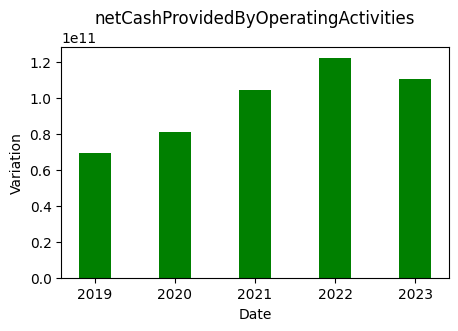

In [334]:
plot_bargraph(
    df_aapl_cashflow[['calendarYear', 'netCashProvidedByOperatingActivities']], 
    date_col='calendarYear', 
    variation_col='netCashProvidedByOperatingActivities',
    title='netCashProvidedByOperatingActivities'
)

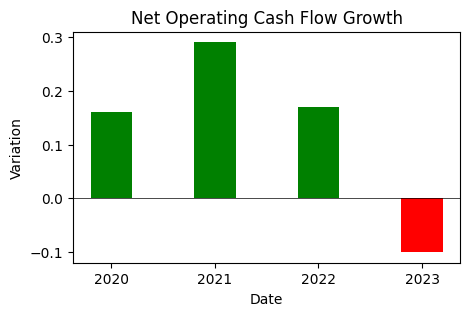

In [17]:
plot_bargraph(
    df_operationCash, 
    date_col='calendarYear', 
    variation_col='Net Operating Cash Flow Growth',
    title='Net Operating Cash Flow Growth'
)

### Net Income

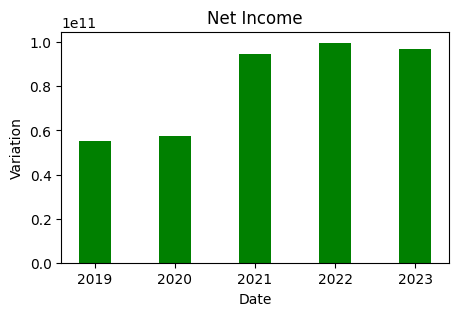

In [335]:
plot_bargraph(
    df_aapl_cashflow[['calendarYear', 'netIncome']], 
    date_col='calendarYear', 
    variation_col='netIncome',
    title='Net Income'
)

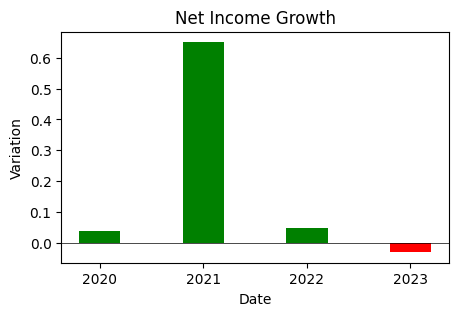

In [18]:
df_netincome = get_variation(df_aapl_cashflow[['calendarYear', 'netIncome']], col='netIncome', new_colname='netIncomeChange')
plot_bargraph(
    df_netincome, 
    date_col='calendarYear', 
    variation_col='netIncomeChange',
    title='Net Income Growth'
)

### Changes in Working Capital

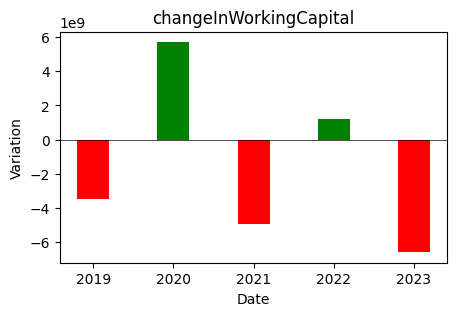

In [19]:
df_wc  = df_aapl_cashflow[['calendarYear', 'changeInWorkingCapital']]

plot_bargraph(
    df_wc, 
    date_col='calendarYear', 
    variation_col='changeInWorkingCapital',
    title='changeInWorkingCapital'
)

In [20]:
df_wc

,calendarYear,changeInWorkingCapital
4,2019,-3488000000
3,2020,5690000000
2,2021,-4911000000
1,2022,1200000000
0,2023,-6577000000


### Depreciation, Depletion & Amortization

In [21]:
df_depreciationAndAmortization = df_aapl_cashflow[['calendarYear', 'depreciationAndAmortization']]
df_depreciationAndAmortization_variatoin = get_variation(df_depreciationAndAmortization, col='depreciationAndAmortization', new_colname='depreciationAndAmortization_variation')
df_depreciationAndAmortization_variatoin

,calendarYear,depreciationAndAmortization,depreciationAndAmortization_variation
3,2020,11056000000,-0.12
2,2021,11284000000,0.02
1,2022,11104000000,-0.02
0,2023,11519000000,0.04


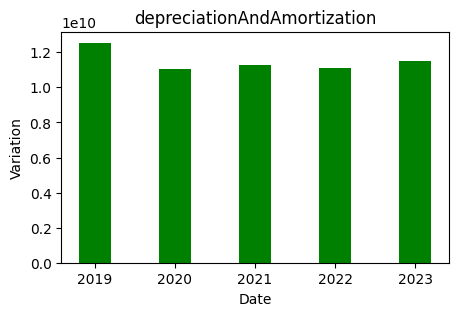

In [23]:
plot_bargraph(
    df_depreciationAndAmortization, 
    date_col='calendarYear', 
    variation_col='depreciationAndAmortization',
    title='depreciationAndAmortization'
)

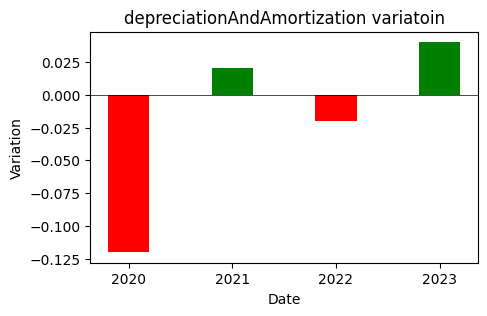

In [22]:
plot_bargraph(
    df_depreciationAndAmortization_variatoin, 
    date_col='calendarYear', 
    variation_col='depreciationAndAmortization_variation',
    title='depreciationAndAmortization variatoin'
)

## Investing Activities

Investing Activities  
This section reflects where Apple is investing its capital, often in:

- Capital Expenditures (CapEx): Investments in physical assets like factories, stores, or equipment. A rising CapEx might indicate expansion.
- Purchases/Sales of Investments: Apple holds a large portfolio of marketable securities. Analyze how much of their cash flow is tied up in investments versus being deployed in business 
operations.  


In the AAPL cashflow report:  
netCashUsedForInvestingActivites = capitalExpenditure + purchasesOfInvestments + salesMaturitiesOfInvestments + otherInvestingActivites

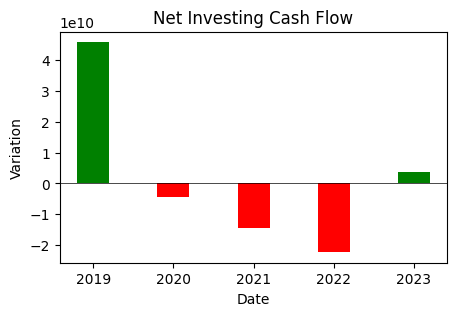

In [24]:
plot_bargraph(
    df_aapl_cashflow[['calendarYear', 'netCashUsedForInvestingActivites']], 
    date_col='calendarYear', 
    variation_col='netCashUsedForInvestingActivites',
    title='Net Investing Cash Flow'
)

### CapEX

In [347]:
df_capital_expenditures = df_aapl_cashflow[['calendarYear', 'capitalExpenditure']].copy()
# df_capital_expenditures['capitalExpenditure'] = - df_capital_expenditures['capitalExpenditure']
df_capital_expenditures_growth = get_variation(df_capital_expenditures, 
                                               col='capitalExpenditure',
                                               new_colname='capitalExpenditure growth')

df_capital_expenditures_growth

,calendarYear,capitalExpenditure,capitalExpenditure growth
3,2020,-7309000000,-0.30
2,2021,-11085000000,0.52
1,2022,-10708000000,-0.03
0,2023,-10959000000,0.02


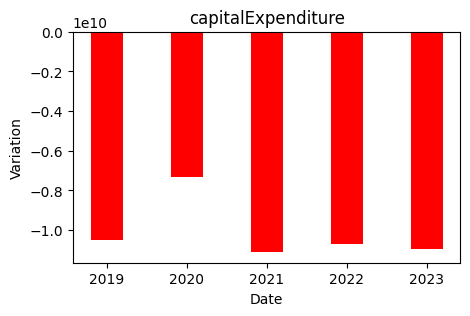

In [348]:
plot_bargraph(df_capital_expenditures,
               date_col='calendarYear',
               variation_col='capitalExpenditure',
               title='capitalExpenditure')

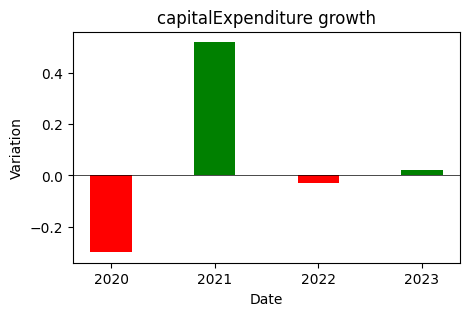

In [346]:
plot_bargraph(df_capital_expenditures_growth,
               date_col='calendarYear',
               variation_col='capitalExpenditure growth',
               title='capitalExpenditure growth')

The decrease of capital expenditure in 2020 may due to pandemic of covid19.

### Net Acuqistions


- Def: The Acquisitions Net of a company is the total cost that a company has paid to acquire other businesses, after adjusting for any associated expenses or disposals. 
- In-Depth: the Acquisitions Net reflects the net amount a company has invested in expanding its operations through acquisitions
- Value: **The Acquisitions Net can provide insightful information about a company's expansion strategy and its efficiency in managing acquisitions and disposals.**

Acquisitions Net = Total Acquisition Costs - Disposal of Subsidiaries - Related Expenses


ref : https://quarterchart.com/financial-insight/acquisitions-net

In [336]:
df_aapl_cashflow[['calendarYear', 'acquisitionsNet']]

,calendarYear,acquisitionsNet
4,2019,-624000000
3,2020,-1524000000
2,2021,-33000000
1,2022,-306000000
0,2023,0


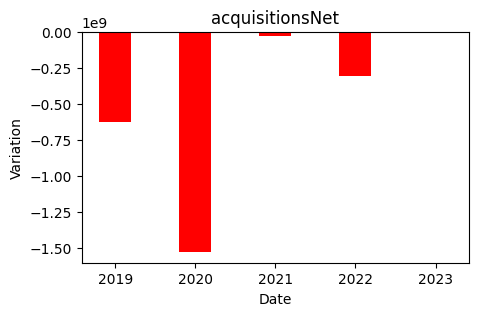

In [28]:
plot_bargraph(df_aapl_cashflow[['calendarYear', 'acquisitionsNet']],
               date_col='calendarYear',
               variation_col='acquisitionsNet',
               title='acquisitionsNet')

Apple acquired several startup in 2020
- Xnor.ai: edge computing, AI
- Scout FM: podcast AI
- Dark sky: Weather forecasting and app
- Voysis: Artificial intelligence/voice assistant
- NextVR: Virtual reality events
- Fleetsmith: Mobile device management(for managing Mac and iPad...etc)
- Mobeewave: Payments startup
- Camerai: 	AR
- Spaces: VR startup


Looks like they wanted to focus on developing AR/VR product and enhancing Siri functions.
- Apple Vision Pro were announced in 2023.
- Siri may got enhanced but its function could be beaten by ChatGPT after it's released in 2022.


Note: add country
the cash can be used to 炒日幣幣值etc

like:
TSMC的製造基地跟RD基地有差，只有製造基地才會對當地or國家造成影響(因為製造基地錢才夠多)

### Purchase/Sale of Investments

In [29]:
col_invest_test = base_column + ['purchasesOfInvestments', 'salesMaturitiesOfInvestments']

df_purchase_sale_of_investments = df_aapl_cashflow[col_invest_test].copy()

df_purchase_sale_of_investments['Purchase/Sale of Investments'] = df_purchase_sale_of_investments['purchasesOfInvestments'] + df_purchase_sale_of_investments['salesMaturitiesOfInvestments']
df_purchase_sale_of_investments

,symbol,calendarYear,purchasesOfInvestments,salesMaturitiesOfInvestments,Purchase/Sale of Investments
4,AAPL,2019,-40631000000,98724000000,58093000000
3,AAPL,2020,-114938000000,120391000000,5453000000
2,AAPL,2021,-109558000000,106483000000,-3075000000
1,AAPL,2022,-76923000000,67363000000,-9560000000
0,AAPL,2023,-29513000000,45514000000,16001000000


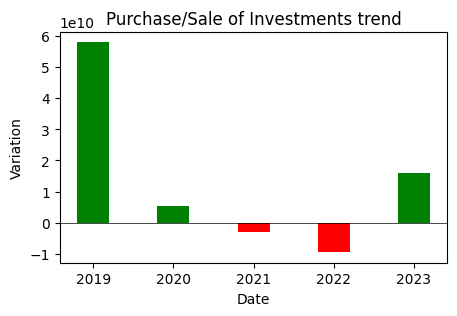

In [30]:
# net of purchase/sale of investments
plot_bargraph(data = df_purchase_sale_of_investments, 
              date_col='calendarYear', 
              variation_col='Purchase/Sale of Investments',
              title='Purchase/Sale of Investments trend')  

- A lot of investments was sold in 2019, what did Apple sell?

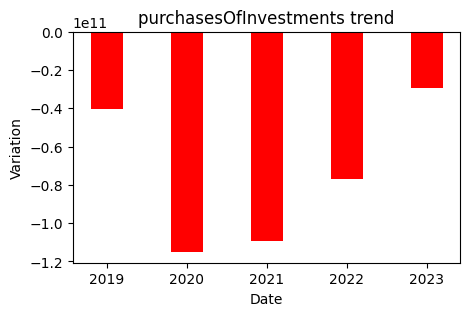

In [31]:
# purchase of investments
plot_bargraph(data = df_purchase_sale_of_investments, 
              date_col='calendarYear', 
              variation_col='purchasesOfInvestments',
              title='purchasesOfInvestments trend')  

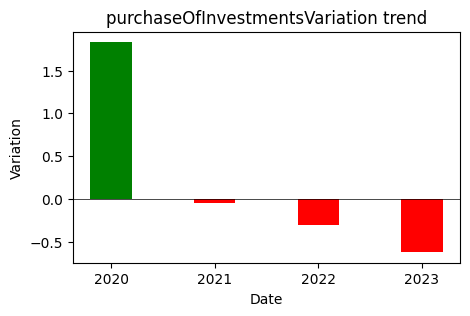

In [32]:
# purchase of investments variation
df_purchase_of_investments = get_variation(df_purchase_sale_of_investments, col='purchasesOfInvestments', new_colname='purchaseOfInvestmentsVariation')
plot_bargraph(
    data=df_purchase_of_investments,
    date_col='calendarYear',
    variation_col='purchaseOfInvestmentsVariation',
    title='purchaseOfInvestmentsVariation trend'
)

- compare to 2019, 2020 purchased a lot

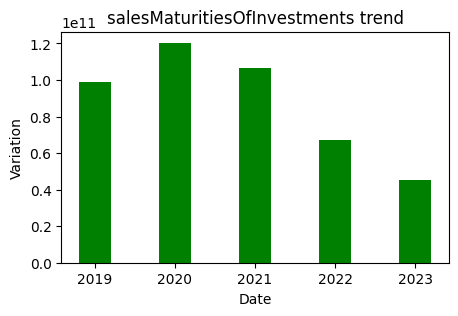

In [33]:
# sale of investments
plot_bargraph(data = df_purchase_sale_of_investments, 
              date_col='calendarYear', 
              variation_col='salesMaturitiesOfInvestments',
              title='salesMaturitiesOfInvestments trend')  

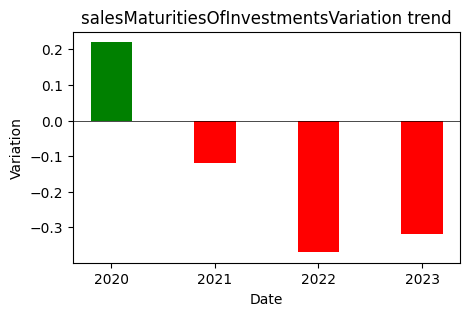

In [34]:
# sale of investments variation
df_sale_of_investments = get_variation(df_purchase_sale_of_investments, col='salesMaturitiesOfInvestments', new_colname='salesMaturitiesOfInvestmentsVariation')
plot_bargraph(
    data=df_sale_of_investments,
    date_col='calendarYear',
    variation_col='salesMaturitiesOfInvestmentsVariation',
    title='salesMaturitiesOfInvestmentsVariation trend'
)


## Financing Activities

This shows how Apple finances its operations and returns cash to shareholders:

- Share Buybacks: Apple has been repurchasing a large number of shares.
- Dividend Payments: Regular cash outflow to shareholders.
- Debt Issuance/Repayment: Analyze whether Apple is issuing debt or repaying it. Despite large cash reserves, Apple has issued debt due to historically low-interest rates.

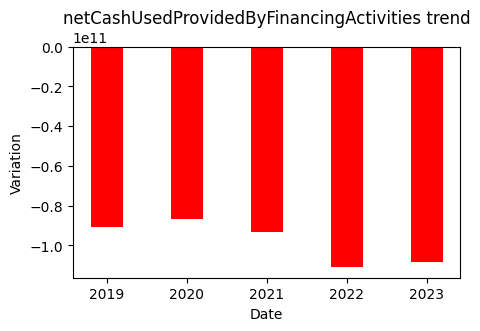

In [35]:
df_netcash_financing = df_aapl_cashflow[['calendarYear', 'netCashUsedProvidedByFinancingActivities']]
plot_bargraph(
    data=df_netcash_financing,
    date_col='calendarYear',
    variation_col='netCashUsedProvidedByFinancingActivities',
    title='netCashUsedProvidedByFinancingActivities trend'
)

debtRepayment should be the 'Change in Long-Term Debt' in the https://www.marketwatch.com/investing/stock/aapl/financials/cash-flow  
but I don't know why the sign is different in 2021 and 2022

After checking with https://finance.yahoo.com/quote/AAPL/cash-flow/, it looks like this data in wrong in the debtRepayment in 2020 and 2021


Conclusion:
- the cash-flow-statement API is wrong in these data.
- So I give up to chase the financing activities for now.

# Key Ratios and Metrics

- Free Cash Flow (FCF):  
FCF = Operating Cash Flow - Capital Expenditures  
This is a key metric to see how much cash is available after Apple covers its basic operational expenses.
- Cash Conversion Ratio (CCR):  
CCR = Operating Cash Flow / Net Income  
This ratio shows how well Apple converts its net income into cash.

In [38]:
# FCF
df_aapl_cashflow['freeCashFlow'] = df_aapl_cashflow['operatingCashFlow'] - df_aapl_cashflow['capitalExpenditure']
df_aapl_cashflow[['calendarYear', 'freeCashFlow']]

,calendarYear,freeCashFlow
4,2019,79886000000
3,2020,87983000000
2,2021,115123000000
1,2022,132859000000
0,2023,121502000000


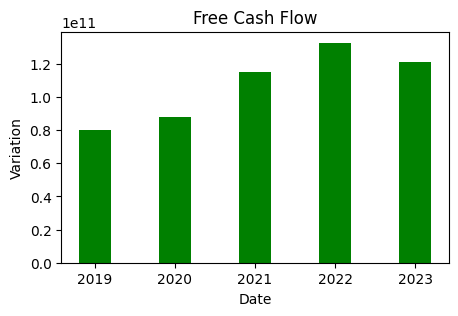

In [37]:
plot_bargraph(
    data=df_aapl_cashflow,
    date_col='calendarYear',
    variation_col='freeCashFlow',
    title='Free Cash Flow'
)

Global enconomic index: it relates to with the news we want to focus
Operation is passive
Financing/Investment is massive: there is where we can observer how they spend the money

Repayments of commercial paper, net: 資產科目(assets)， 可抵押的相關資產(Apple收)   ex:客戶用支票(或抵押品如:畫)付錢，Aaple需要的時候去兌換成現金
因營業活動而獲得的commerical paper，到這邊做leverage，

commercial paper includes commercial invoice

Repayments of term debt: 負債科目(liability) includde: AP, 可抵押的相關資產(Apple付)



Global economic index: PMI
